In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized


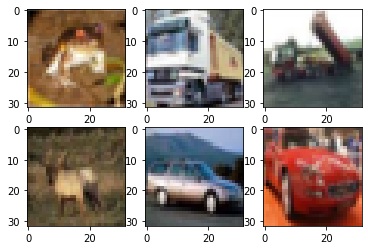

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [6]:
cifar= tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


train_labels = train_labels.reshape(-1,)
train_images = train_images/255 

test_labels = test_labels.reshape(-1,)
test_images = test_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  **CNN Model**







In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(10))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=20
batchSize=0

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



2023-04-09 22:37:49.448671: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2023-04-09 22:37:49.825242: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/20


2023-04-09 22:37:51.297910: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2023-04-09 22:37:52.002734: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-09 22:37:52.003890: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-09 22:37:52.003945: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-04-09 22:37:52.004938: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-09 22:37:52.005011: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1563/1563 [==============================] - 6s 2ms/step - loss: 1.4740 - accuracy: 0.4650
Epoch 2/20
1563/1563 [==============================] - 4s 2ms/step - loss: 1.1139 - accuracy: 0.6047
Epoch 3/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.9748 - accuracy: 0.6563
Epoch 4/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8773 - accuracy: 0.6921
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8048 - accuracy: 0.7183
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.7360 - accuracy: 0.7396
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6706 - accuracy: 0.7648
Epoch 8/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6224 - accuracy: 0.7823
Epoch 9/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5751 - accuracy: 0.7965
Epoch 10/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5261 - accurac

In [12]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.5290 - accuracy: 0.6822
Accuracy :  0.682200014591217


#### Adding SoftMax Layer

Prediction :  automobile


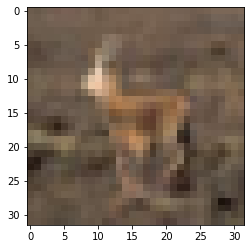

In [26]:

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(1000)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",classes[test_labels[label0]])

313/313 [==============================] - 0s 1ms/step


<AxesSubplot:>

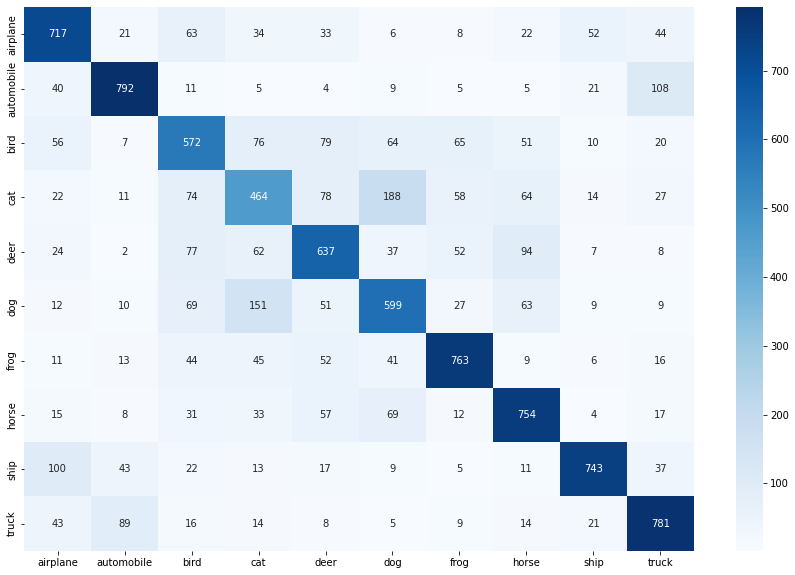

In [11]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")